In [11]:
import yfinance as yf
import ta 
import matplotlib.pyplot as plt

In [13]:
# Downloading S&P 500 E-Mini futures data
futures_symbol = "ES=F"
futures_data = yf.download(futures_symbol, start='2022-01-01', end='2022-04-01', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [15]:
# Calculating technical indicators and concatenating them to the dataframe

# RSI
futures_data["RSI"] = ta.momentum.RSIIndicator(futures_data["Close"]).rsi()

# Bollinger Bands
bbands = ta.volatility.BollingerBands(futures_data["Close"])
futures_data["BB_upper"] = bbands.bollinger_hband()
futures_data["BB_lower"] = bbands.bollinger_lband()

# MACD
macd = ta.trend.MACD(futures_data["Close"])
futures_data["MACD"] = macd.macd()
futures_data["MACD_signal"] = macd.macd_signal()


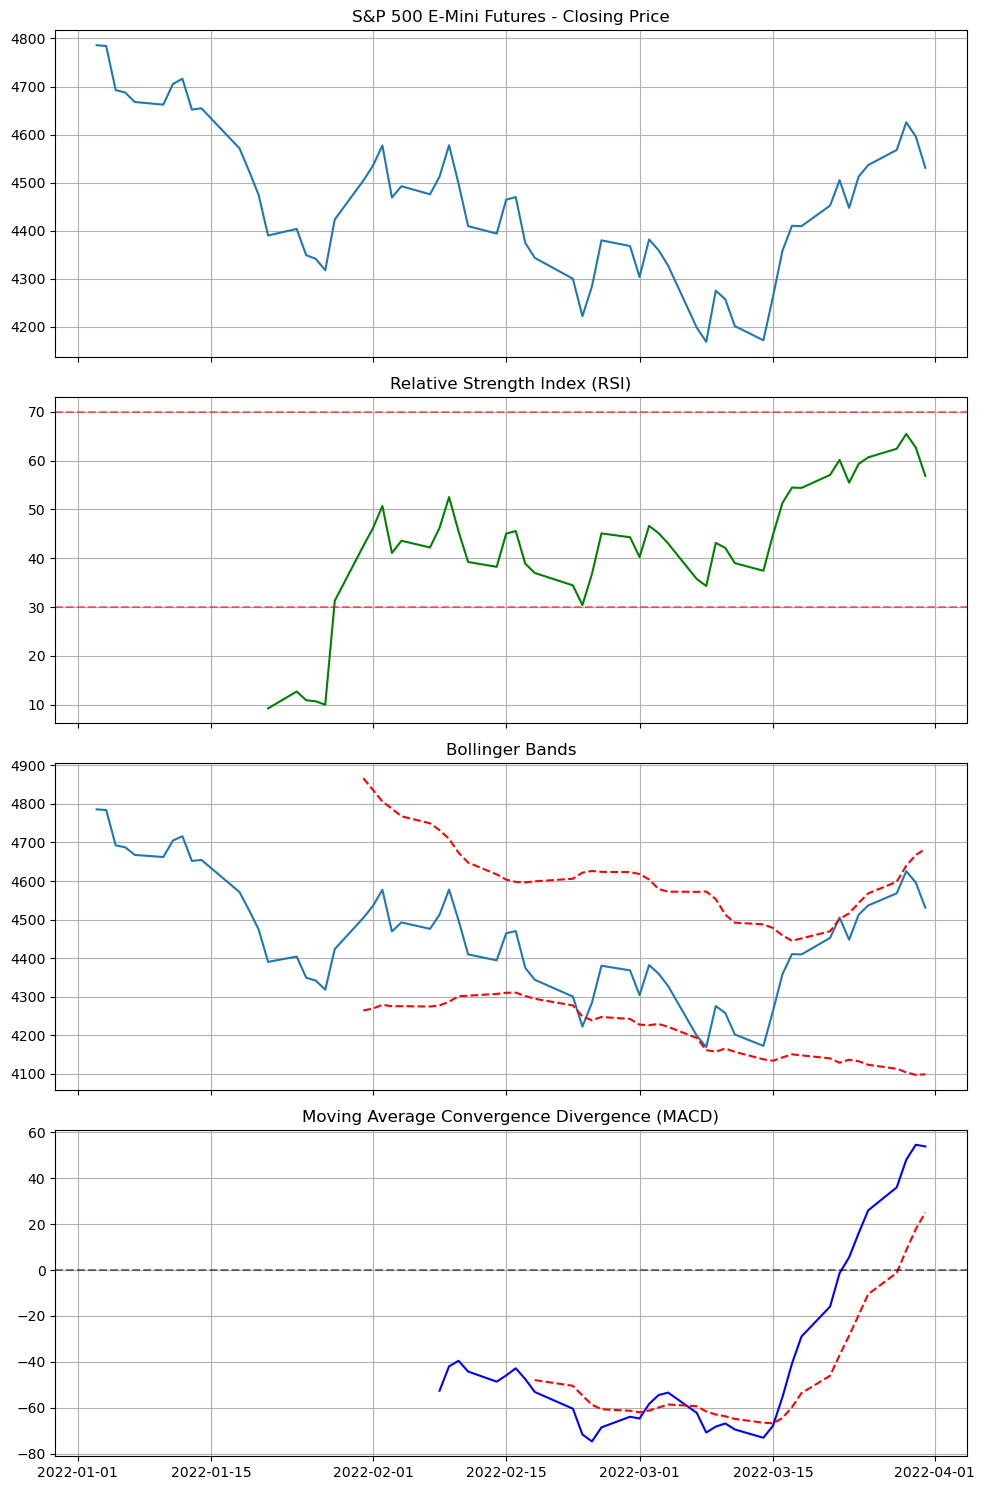

In [19]:
# Create subplots for each indicator
# Create subplots for each indicator
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plot closing price
axes[0].plot(futures_data.index, futures_data["Close"], label="Close")
axes[0].set_title("S&P 500 E-Mini Futures - Closing Price")
axes[0].grid()

# Plot RSI
axes[1].plot(futures_data.index, futures_data["RSI"], label="RSI", color="g")
axes[1].axhline(30, linestyle="--", color="r", alpha=0.5)
axes[1].axhline(70, linestyle="--", color="r", alpha=0.5)
axes[1].set_title("Relative Strength Index (RSI)")
axes[1].grid()

# Plot Bollinger Bands
axes[2].plot(futures_data.index, futures_data["Close"], label="Close")
axes[2].plot(futures_data.index, futures_data["BB_upper"], label="Upper Bollinger Band", linestyle="--", color="r")
axes[2].plot(futures_data.index, futures_data["BB_lower"], label="Lower Bollinger Band", linestyle="--", color="r")
axes[2].set_title("Bollinger Bands")
axes[2].grid()

# Plot MACD
axes[3].plot(futures_data.index, futures_data["MACD"], label="MACD", color="b")
axes[3].plot(futures_data.index, futures_data["MACD_signal"], label="Signal Line", linestyle="--", color="r")
axes[3].axhline(0, linestyle="--", color="k", alpha=0.5)
axes[3].set_title("Moving Average Convergence Divergence (MACD)")
axes[3].grid()

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()